# THE ALIASING CORRECTION SEEMS TO BE WORKING PERFECTLY HERE.

In [1]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules_v1 import euler as euler
from modules_v1 import rs_rad_ker as rk
from modules_v1 import convert_qu2eb as qb
from modules_v1 import convert_eb2qu as bq
from modules_v1 import convert_qu2_equ_bqu_new as qq
from scipy.interpolate import interp1d
from modules_v0 import local_eb_kernel as lrk
from modules_v1 import aliasing_correction as ac

%pylab notebook
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
nside=16 ; npix=h.nside2npix(nside)
sampling=4500
lmax=2*nside

pxsize=sqrt(4.*pi/h.nside2npix(nside))
beta0=min(180,180.*32/(lmax))*pi/180. ; print beta0*180/pi

theta,pl2=rk.get_plm0(lmax,sampling,theta_max=min(pi,3.*beta0))
theta_cutoff=pi

180.0


y=lrk.real_space_queb_kernels(nside,0,180.,lmax,sampling)
y.calc_qu2eb_rad_kernel(lmax)
y.calc_qu2queb_rad_kernel(lmax)
y.setup_fn_rad_ker()

In [3]:
cltemp=h.read_cl("../../data/cl_rem3.fits")
clr=[cltemp[0],cltemp[1],cltemp[2],cltemp[3]*0]

In [4]:
def get_alm(cl,lmax,mmax,seed=0):
    random.seed(seed)
    almsize=h.Alm.getsize(lmax,mmax)
    ar=random.normal(size=almsize)
    ai=random.normal(size=almsize)
    alm=zeros(almsize,complex)
    for i in range(almsize):
        l,m=h.Alm.getlm(lmax,i)
        if m==0:
            alm[i]=complex(ar[i],0.)*sqrt(cl[l])
        else:
            alm[i]=complex(ar[i],ai[i])*sqrt(0.5*cl[l])
    return alm

In [5]:
mmax=lmax
##########################################################
almt=get_alm(clr[0],lmax,mmax,1) ; alme=get_alm(clr[1],lmax,mmax,8) ; almb=get_alm(clr[2],lmax,mmax,3)
true_alm=[almt,alme,almb] 

ttqu=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=True) 
tteb=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=False)

alm=h.map2alm(ttqu,lmax=lmax,mmax=lmax,iter=0)
hteb=h.alm2map(alm,nside,pol=False,lmax=lmax,mmax=lmax)

alm=h.map2alm(ttqu,lmax=lmax,mmax=mmax,iter=0,pol=False)
htqu=h.alm2map(alm,nside,pol=True,lmax=lmax,mmax=mmax)

alm=h.map2alm(ttqu,lmax=lmax,mmax=mmax,iter=0)
alm[2][:]= 0 ; htque=h.alm2map(alm,nside,pol=True,lmax=lmax,mmax=mmax)
alm=h.map2alm(ttqu,lmax=lmax,mmax=mmax,iter=0)
alm[1][:]= 0 ; htqub=h.alm2map(alm,nside,pol=True,lmax=lmax,mmax=mmax)
###########################################################
#almt=get_alm(clr[0],lmax,mmax,4) ; alme=get_alm(clr[1],lmax,mmax,5) ; almb=get_alm(clr[2],lmax,mmax,6)
#true_alm=[almt,alme,almb] 
#tteb1=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=False) ; cltrue=h.alm2cl(true_alm,lmax=lmax,mmax=mmax)
#
#tqu1=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=True) 
#alm=h.map2alm(tqu,lmax=lmax,mmax=mmax,iter=0)
#hteb1=h.alm2map(alm,nside,pol=False,lmax=lmax,mmax=mmax) ; cl1=h.alm2cl(alm,lmax=lmax,mmax=mmax)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [6]:
apow=rk.fn_apodization(theta,theta_cutoff=theta_cutoff,apow_frac=0.001) ; apow[:]=1.
rad_ker=rk.calc_qu2eb_rad_ker(lmax,theta,pl2)# Default
rad_ker_i,rad_ker_d=rk.calc_qu2queb_rad_ker(lmax,theta,pl2)# Default

figure()
plot(theta,rad_ker)
plot(theta,rad_ker,"--")
axvline(pxsize)
xlim(0,min(pi,1.5*theta_cutoff))
rad_ker=rad_ker*apow

figure()
#plot(y.theta*180./pi,y.fn_rad_ker_m2(y.theta)*npix/(4.*pi),"k-")
plot(theta*180./pi,rad_ker_i,"r--")
#plot(y.theta*180./pi,y.fn_rad_ker_p2(y.theta)*npix/(4.*pi),"k-")
plot(theta*180./pi,rad_ker_d,"--")
#semilogy()

t1=time.time()
requ,rbqu=qq.convert_qu2_equ_bqu(ttqu[1],ttqu[2],180.*np.pi/180.,theta,rad_ker_i=rad_ker_i,rad_ker_d=rad_ker_d)
print time.time()-t1

In [7]:
alm=h.map2alm(ttqu,lmax=lmax,mmax=mmax,iter=3,pol=True)
htqu=h.alm2map(alm,nside,pol=True)
hteb=h.alm2map(alm,nside,pol=False)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


# Testing QU --> EB

In [8]:
ctqu=ac.correct_aliasing_convolve(ttqu[1],ttqu[2],pi,theta,rad_ker_i,iter=3)

In [9]:
ctqu_c=ac.correct_aliasing_convolve(ttqu[1],ttqu[2],pi,theta,rad_ker_i,iter=3)
ctqu_r=ac.correct_aliasing_radiate(ttqu[1],ttqu[2],pi,theta,rad_ker_i,iter=3)

<IPython.core.display.Javascript object>


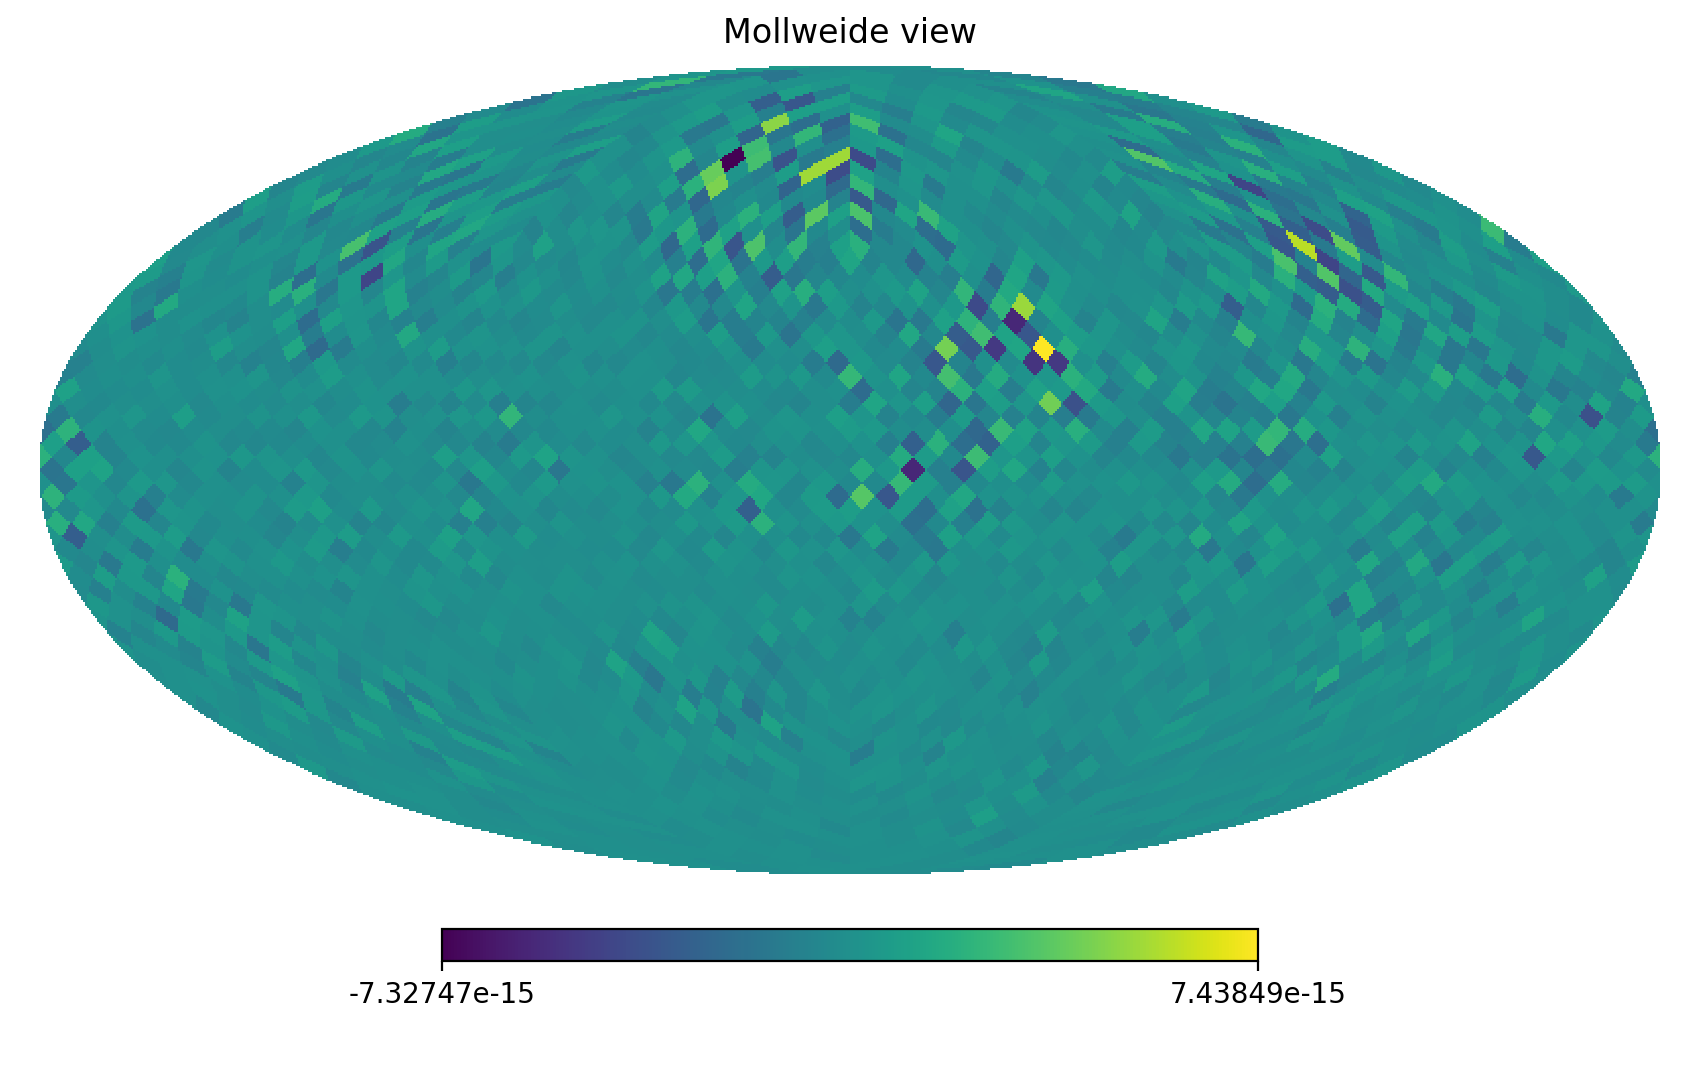

<IPython.core.display.Javascript object>


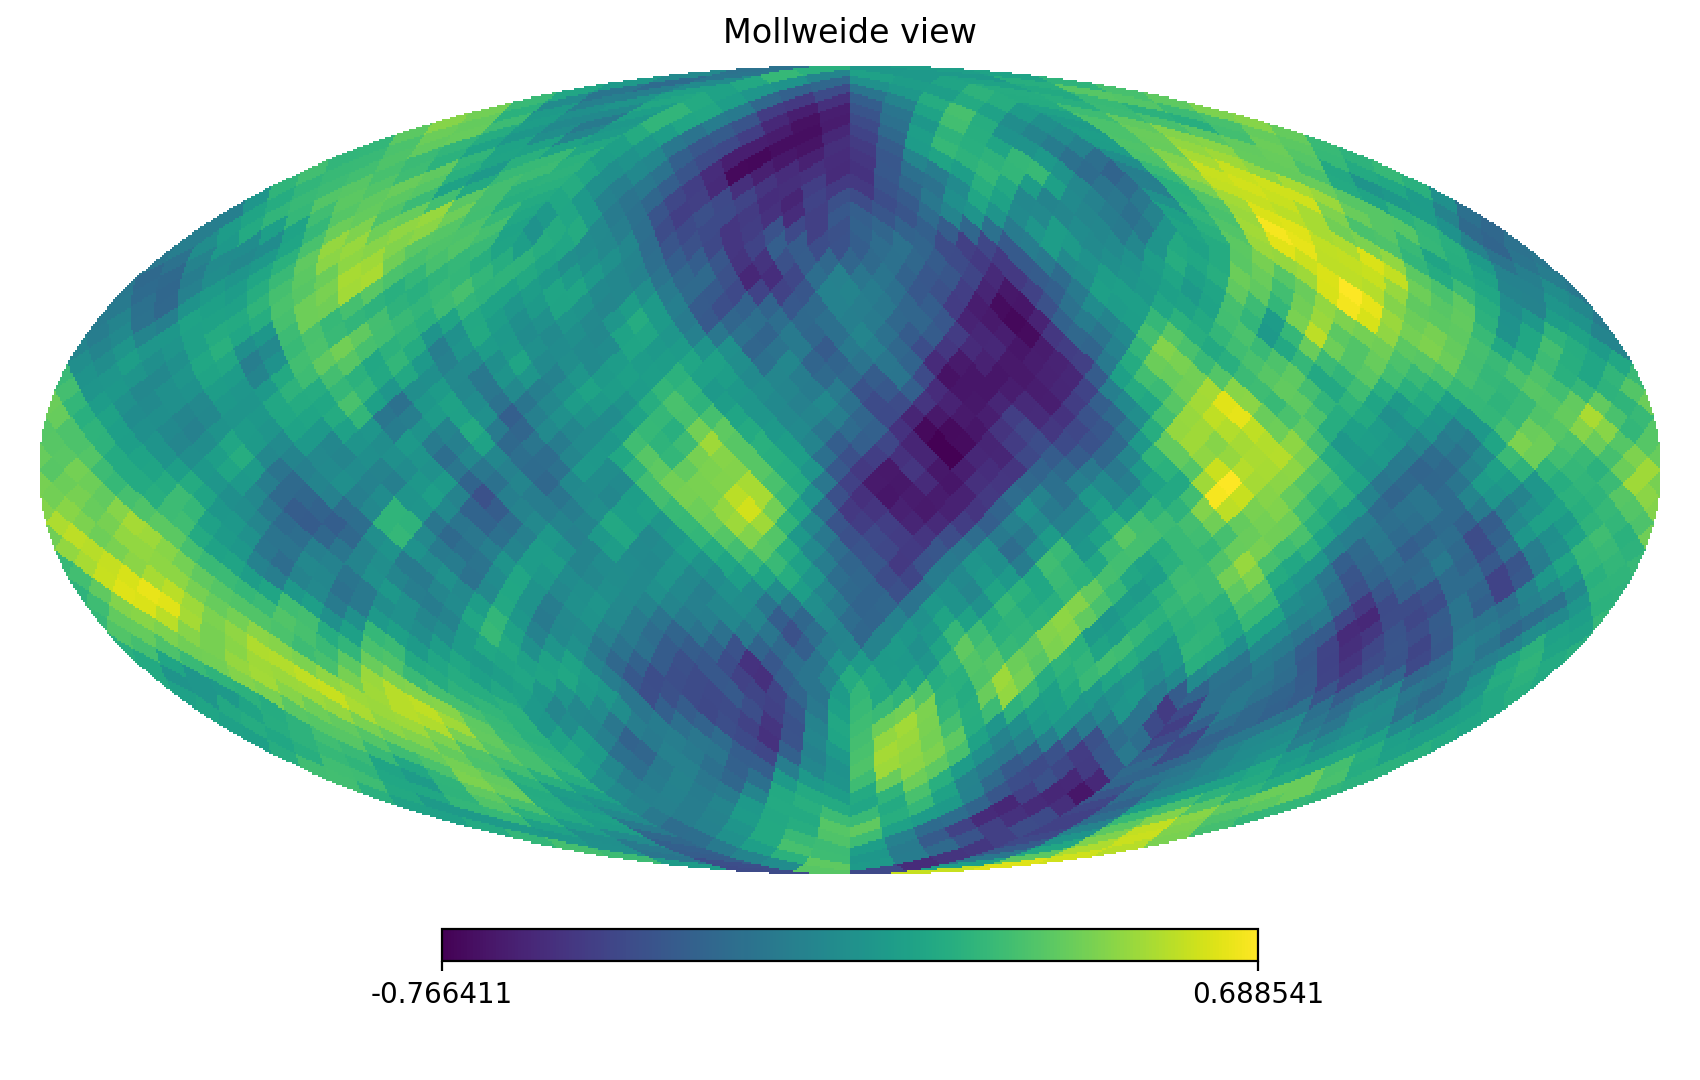

In [10]:
h.mollview(ctqu_c[2]-ctqu_r[2],rot=(0,0))
h.mollview(ctqu_r[2])

In [11]:
tebr=qb.convert_qu2eb_radiate_masked(ctqu[1],ctqu[2],pi,theta,rad_ker)
tebc=qb.convert_qu2eb_integrate_masked(ctqu[1],ctqu[2],pi,theta,rad_ker)

../../codes/modules_v1/euler.py:87: RuntimeWarning: divide by zero encountered in divide
  sinalpha=np.where(abs(cosbeta)<1.,-np.sin(theta1)*np.sin(phi0-phi1)/np.sqrt(1.-cosbeta*cosbeta),0.)
../../codes/modules_v1/euler.py:87: RuntimeWarning: invalid value encountered in divide
  sinalpha=np.where(abs(cosbeta)<1.,-np.sin(theta1)*np.sin(phi0-phi1)/np.sqrt(1.-cosbeta*cosbeta),0.)
../../codes/modules_v1/euler.py:88: RuntimeWarning: invalid value encountered in divide
  cosalpha=np.where(abs(cosbeta)<1.,(np.cos(theta1) - np.cos(theta0)*cosbeta)/(np.sin(theta0)*np.sqrt(1.-cosbeta*cosbeta)),0)
../../codes/modules_v1/euler.py:88: RuntimeWarning: divide by zero encountered in divide
  cosalpha=np.where(abs(cosbeta)<1.,(np.cos(theta1) - np.cos(theta0)*cosbeta)/(np.sin(theta0)*np.sqrt(1.-cosbeta*cosbeta)),0)
../../codes/modules_v1/euler.py:87: RuntimeWarning: invalid value encountered in sqrt
  sinalpha=np.where(abs(cosbeta)<1.,-np.sin(theta1)*np.sin(phi0-phi1)/np.sqrt(1.-cosbeta*cosbeta),0.)
..

<IPython.core.display.Javascript object>


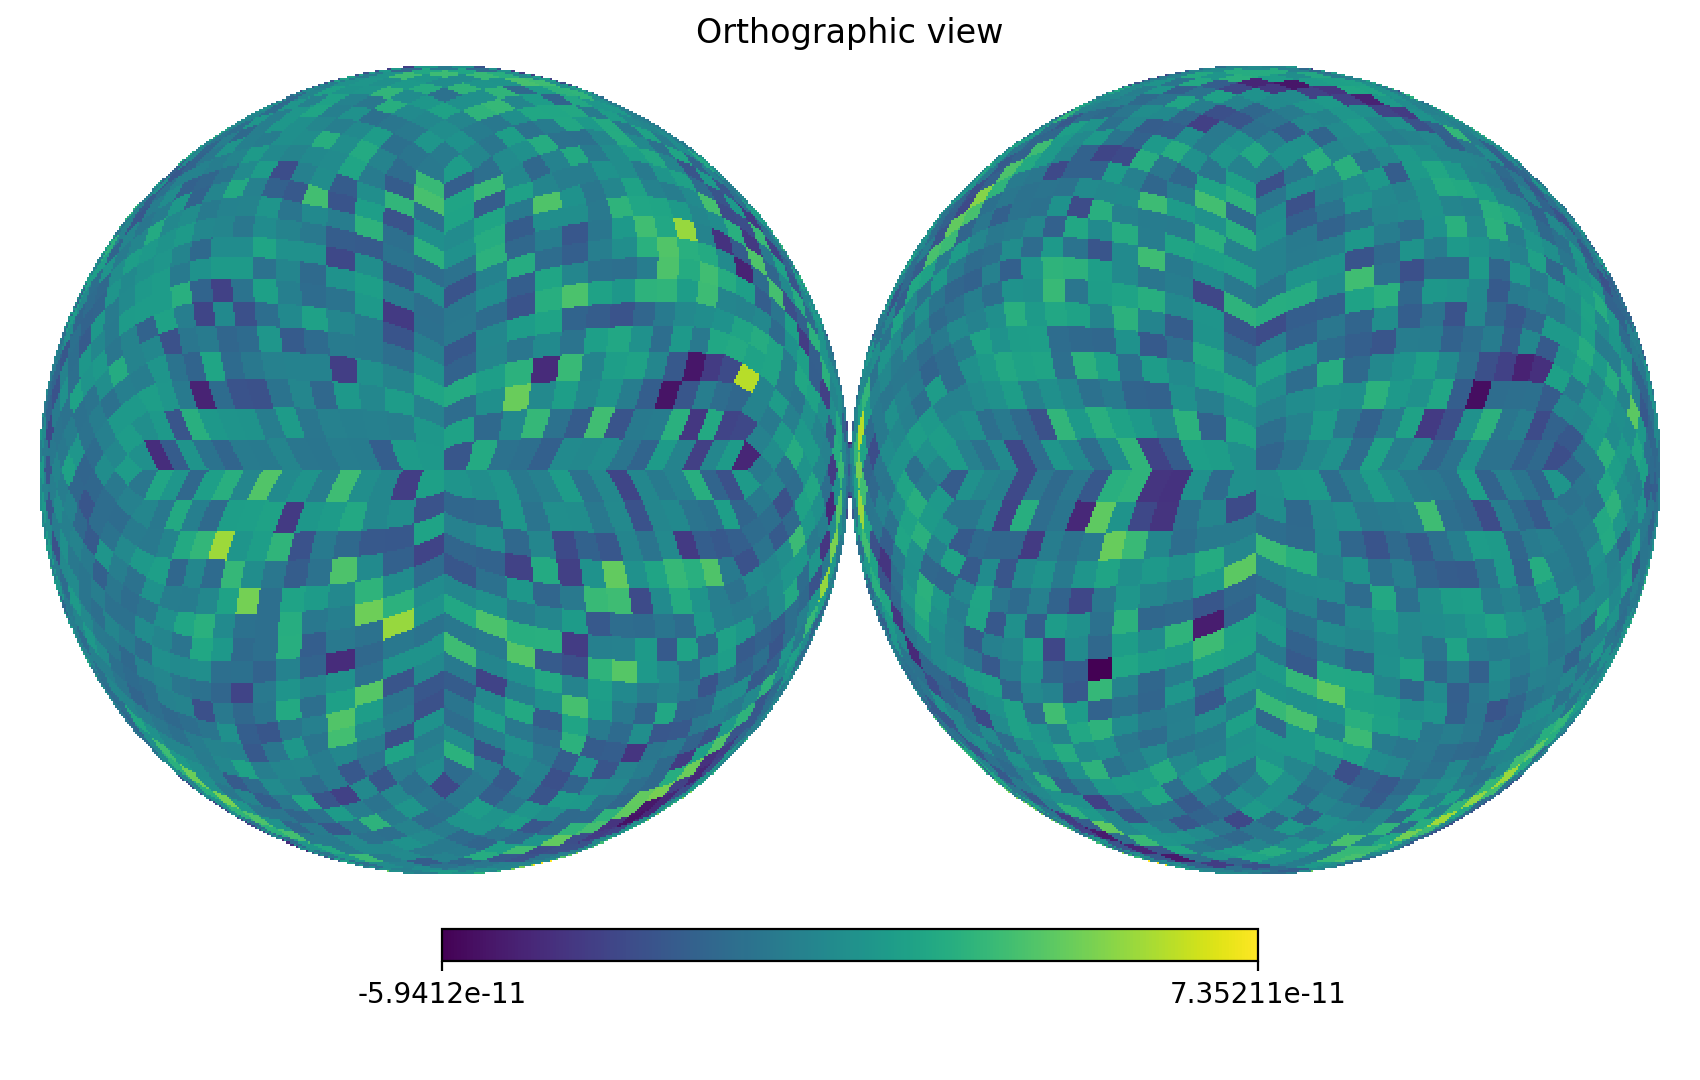

<IPython.core.display.Javascript object>


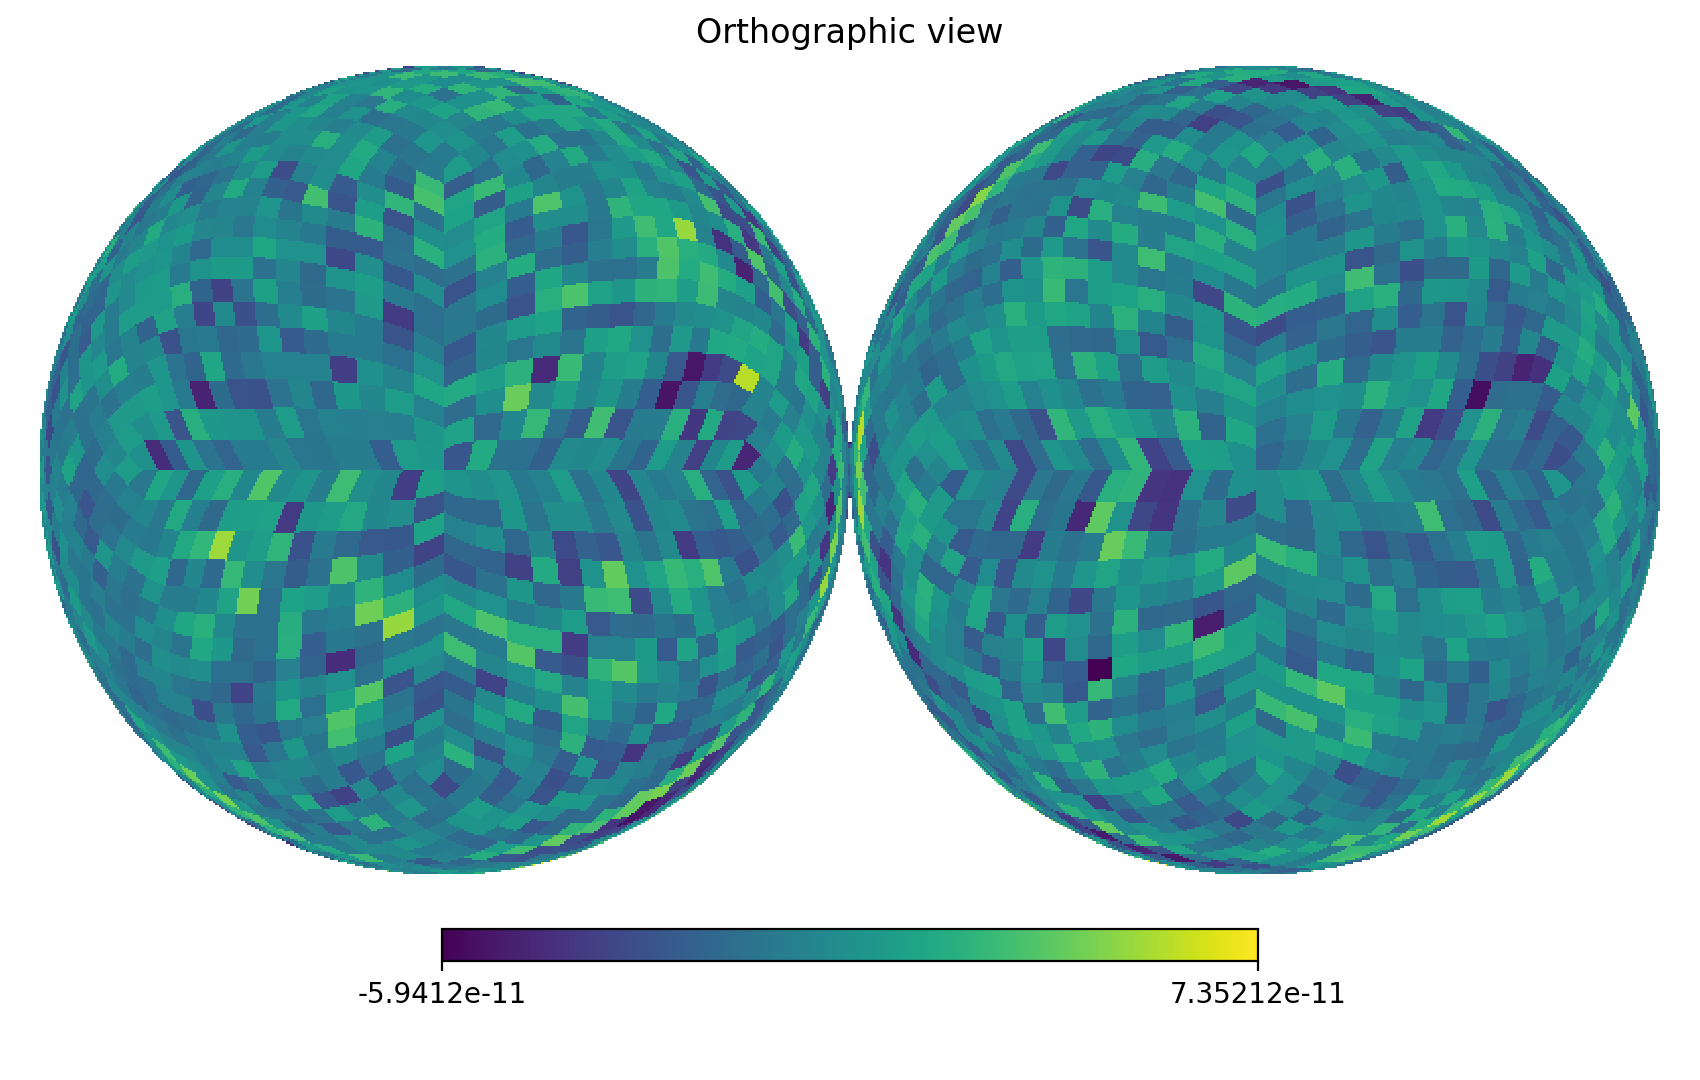

In [12]:
h.orthview(tebr[2]-hteb[2],rot=(0,90))
h.orthview(tebc[2]-hteb[2],rot=(0,90))

<IPython.core.display.Javascript object>


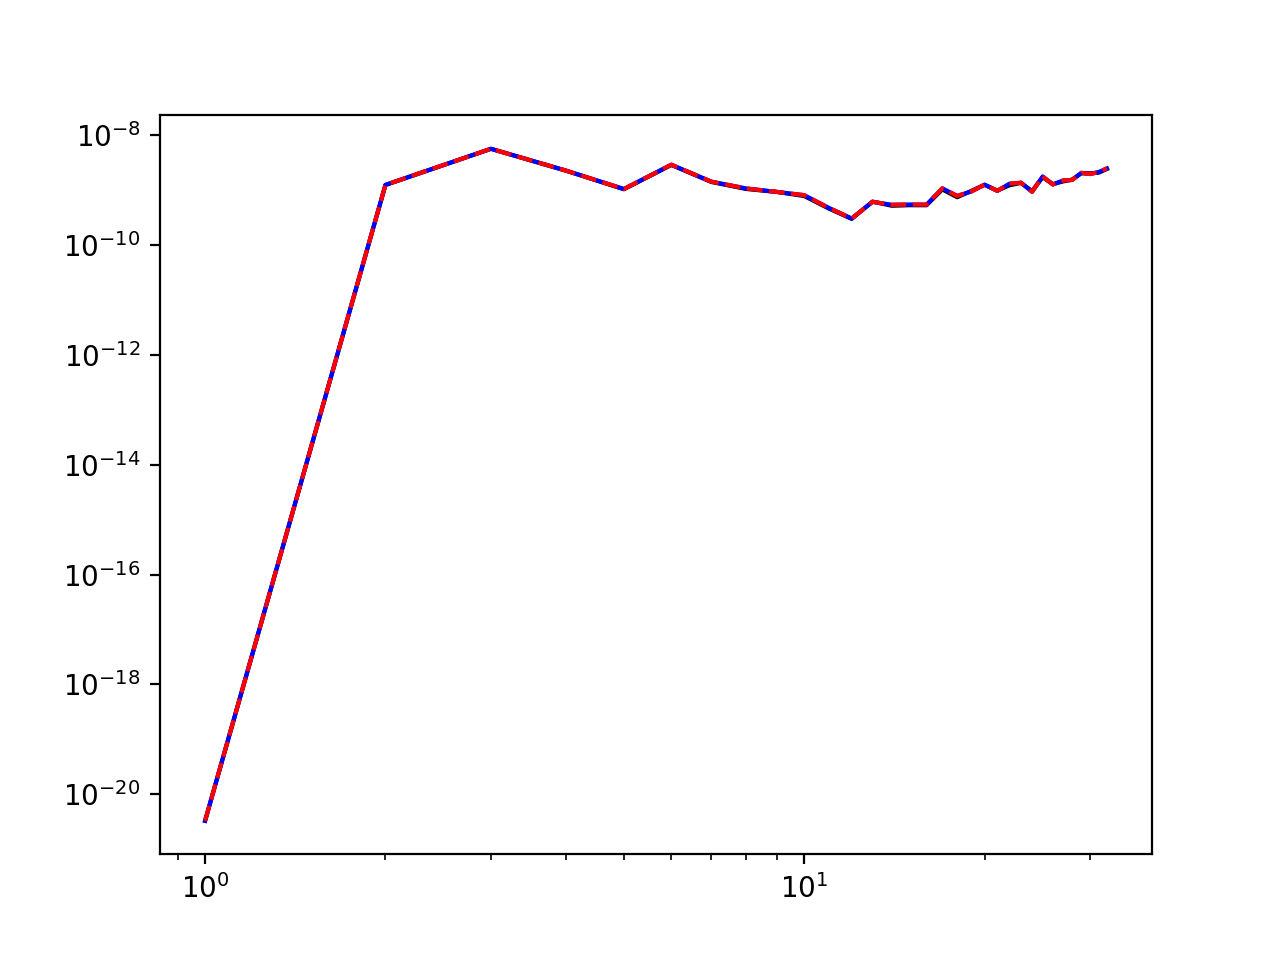

[]

In [13]:
lmax=2*nside
clrteb=h.alm2cl(h.map2alm(tebr[2],lmax=lmax))
clhteb=h.alm2cl(h.map2alm(hteb[2],lmax=lmax))
cltteb=h.alm2cl(h.map2alm(tteb[2],lmax=lmax))

ell=arange(lmax+1)
fll=ell*(ell+1)/(2.*pi)
figure()
plot(ell,fll*cltteb,"k-")
plot(ell,fll*clhteb,"b-")
plot(ell,fll*clrteb,"r--")
loglog()
#ylim(1e-10,1e-7)

# Testing EB --> QU

In [14]:
htqu=h.alm2map(h.map2alm(tteb,lmax=lmax,iter=0,pol=False),nside,pol=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [15]:
tqur=bq.convert_eb2qu_radiate_masked(tteb[1],tteb[2],pi,theta,rad_ker)
tquc=bq.convert_eb2qu_integrate_masked(tteb[1],tteb[2],pi,theta,rad_ker)

<IPython.core.display.Javascript object>


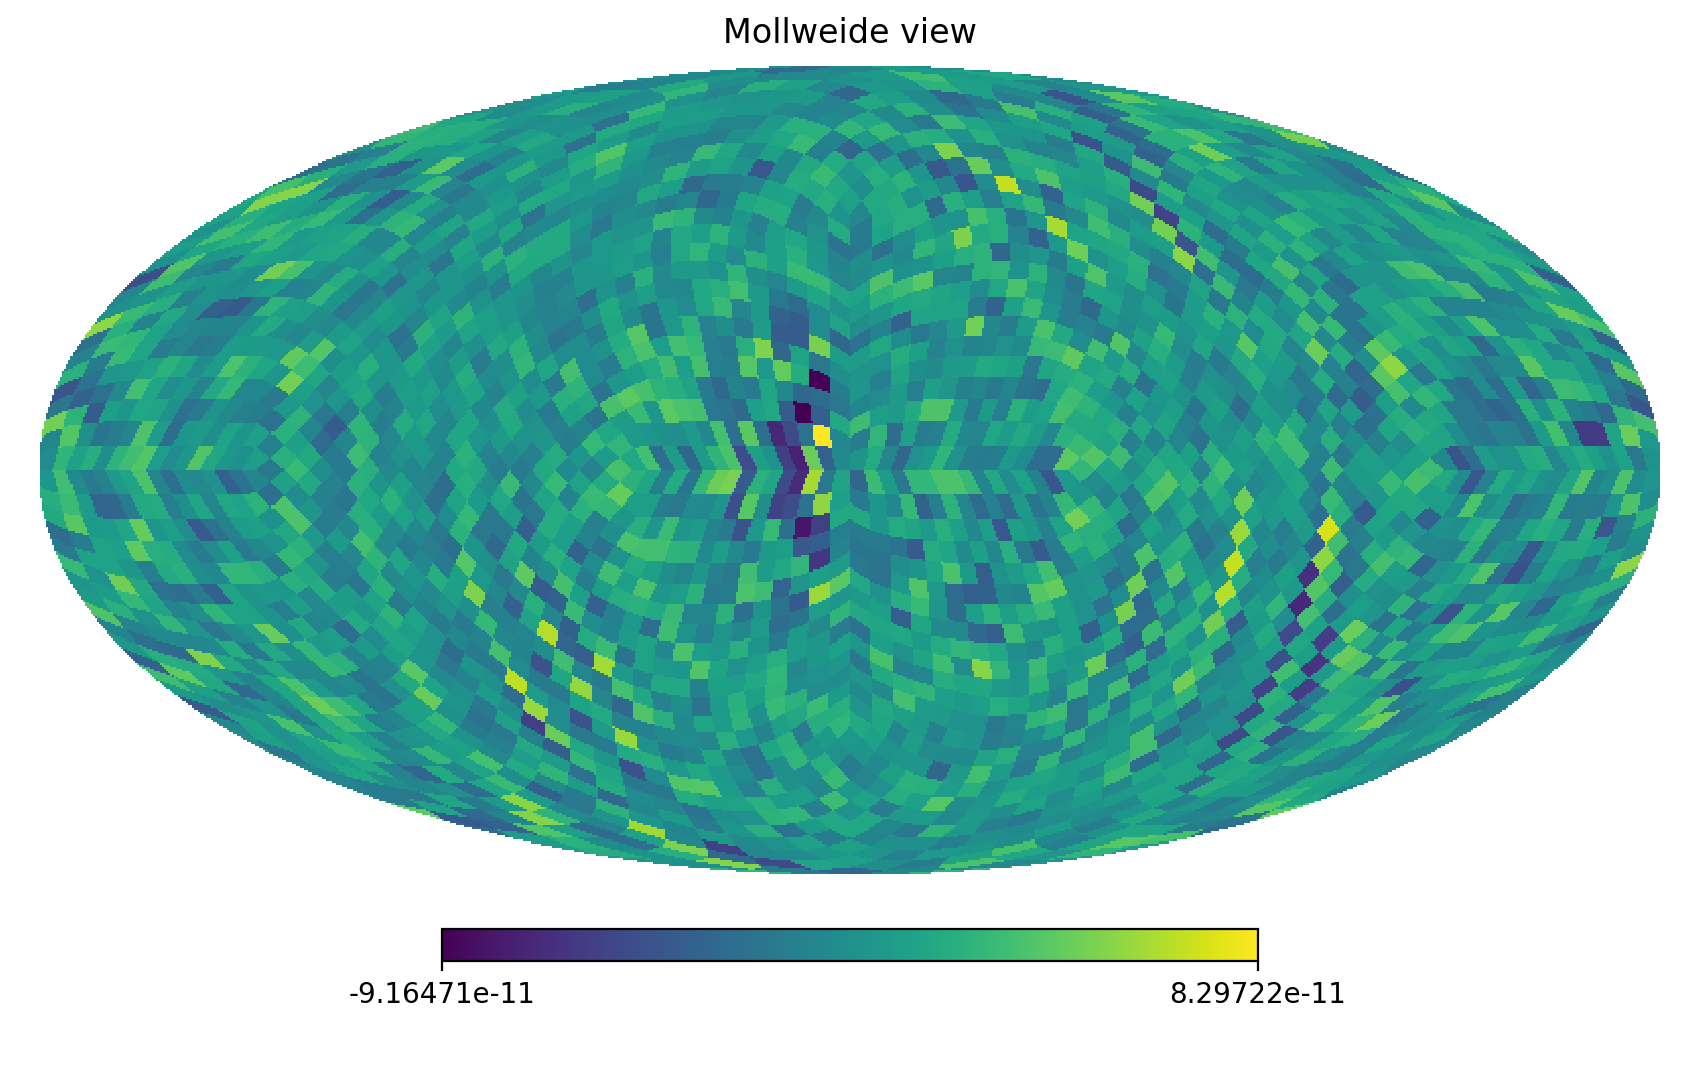

<IPython.core.display.Javascript object>


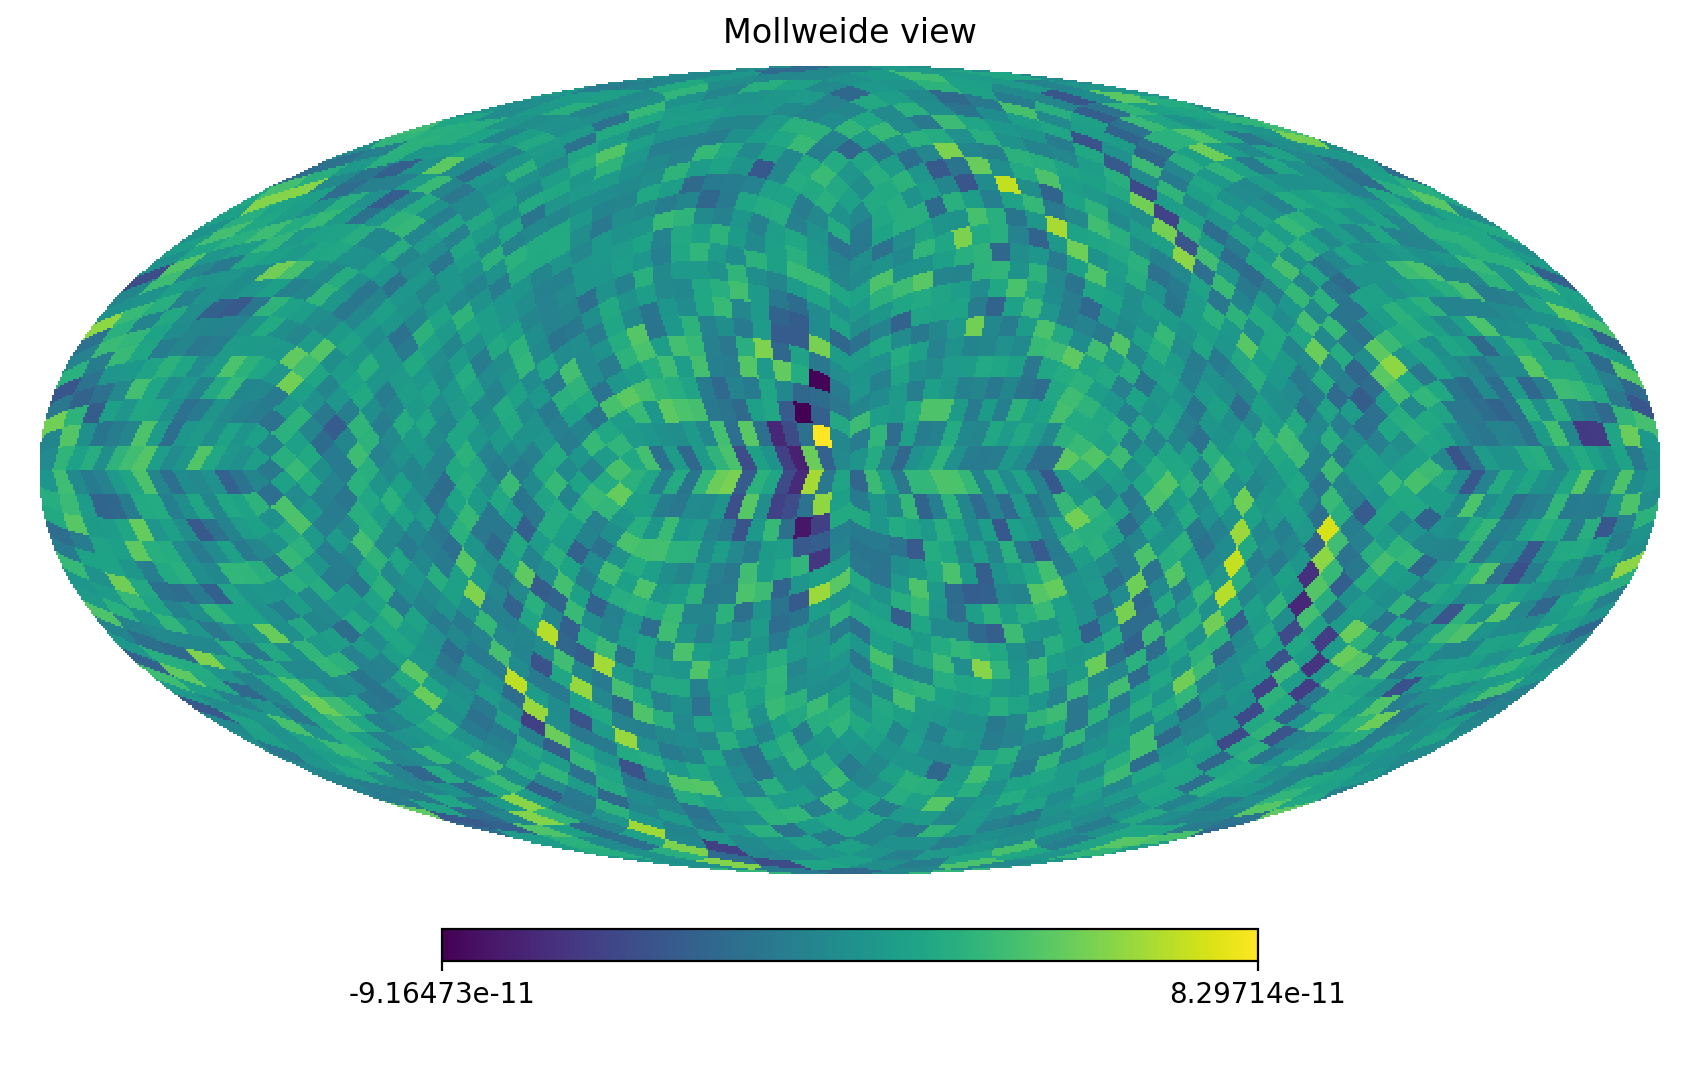

In [16]:
h.mollview(tqur[1]-htqu[1],rot=(0,90))
h.mollview(tquc[1]-htqu[1],rot=(0,90))

# Testing QU --> EQU, BQU

In [17]:
alm=h.map2alm(ttqu,lmax=lmax,iter=0) ; alm[2]=0. ; htque=h.alm2map(alm,nside,pol=True)
alm=h.map2alm(ttqu,lmax=lmax,iter=0) ; alm[1]=0. ; htqub=h.alm2map(alm,nside,pol=True)

ttque=h.alm2map([true_alm[0],true_alm[1],true_alm[2]*0.],nside,pol=True)
ttqub=h.alm2map([true_alm[0],true_alm[1]*0.,true_alm[2]],nside,pol=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [18]:
mask=np.zeros(npix,float)
tmask=np.zeros(npix,float)
thetai=h.pix2ang(nside,arange(npix))[0]*180./pi
phii=h.pix2ang(nside,arange(npix))[1]*180./pi
pmask[phii<40]=1 ; pmask[phii>320]=1
mask[thetai<88]=1. ; mask[thetai>92]=1. #; mask=1.-mask

pmask=h.smoothing(pmask,sigma=2.*pi/180.)
mask=h.smoothing(mask,sigma=2.*pi/180.)
mask=pmask*(1-mask)
h.mollview(mask)


NameError: name 'pmask' is not defined

In [19]:
equi,bqui=qq.convert_qu2_equ_bqu_integrate(ones(npix,float)*mask,zeros(npix,float),pi,theta,rad_ker_d)#,cq=ctqu[1],cu=ctqu[2])
#equr,bqur=qq.convert_qu2_equ_bqu_radiate(ttqu[1],ttqu[2],pi,theta,rad_ker_d)#,cq=ctqu[1],cu=ctqu[2])

In [20]:
teb=qb.convert_qu2eb_radiate(ones(npix,float)*mask,zeros(npix,float),pi,theta,rad_ker)

<IPython.core.display.Javascript object>


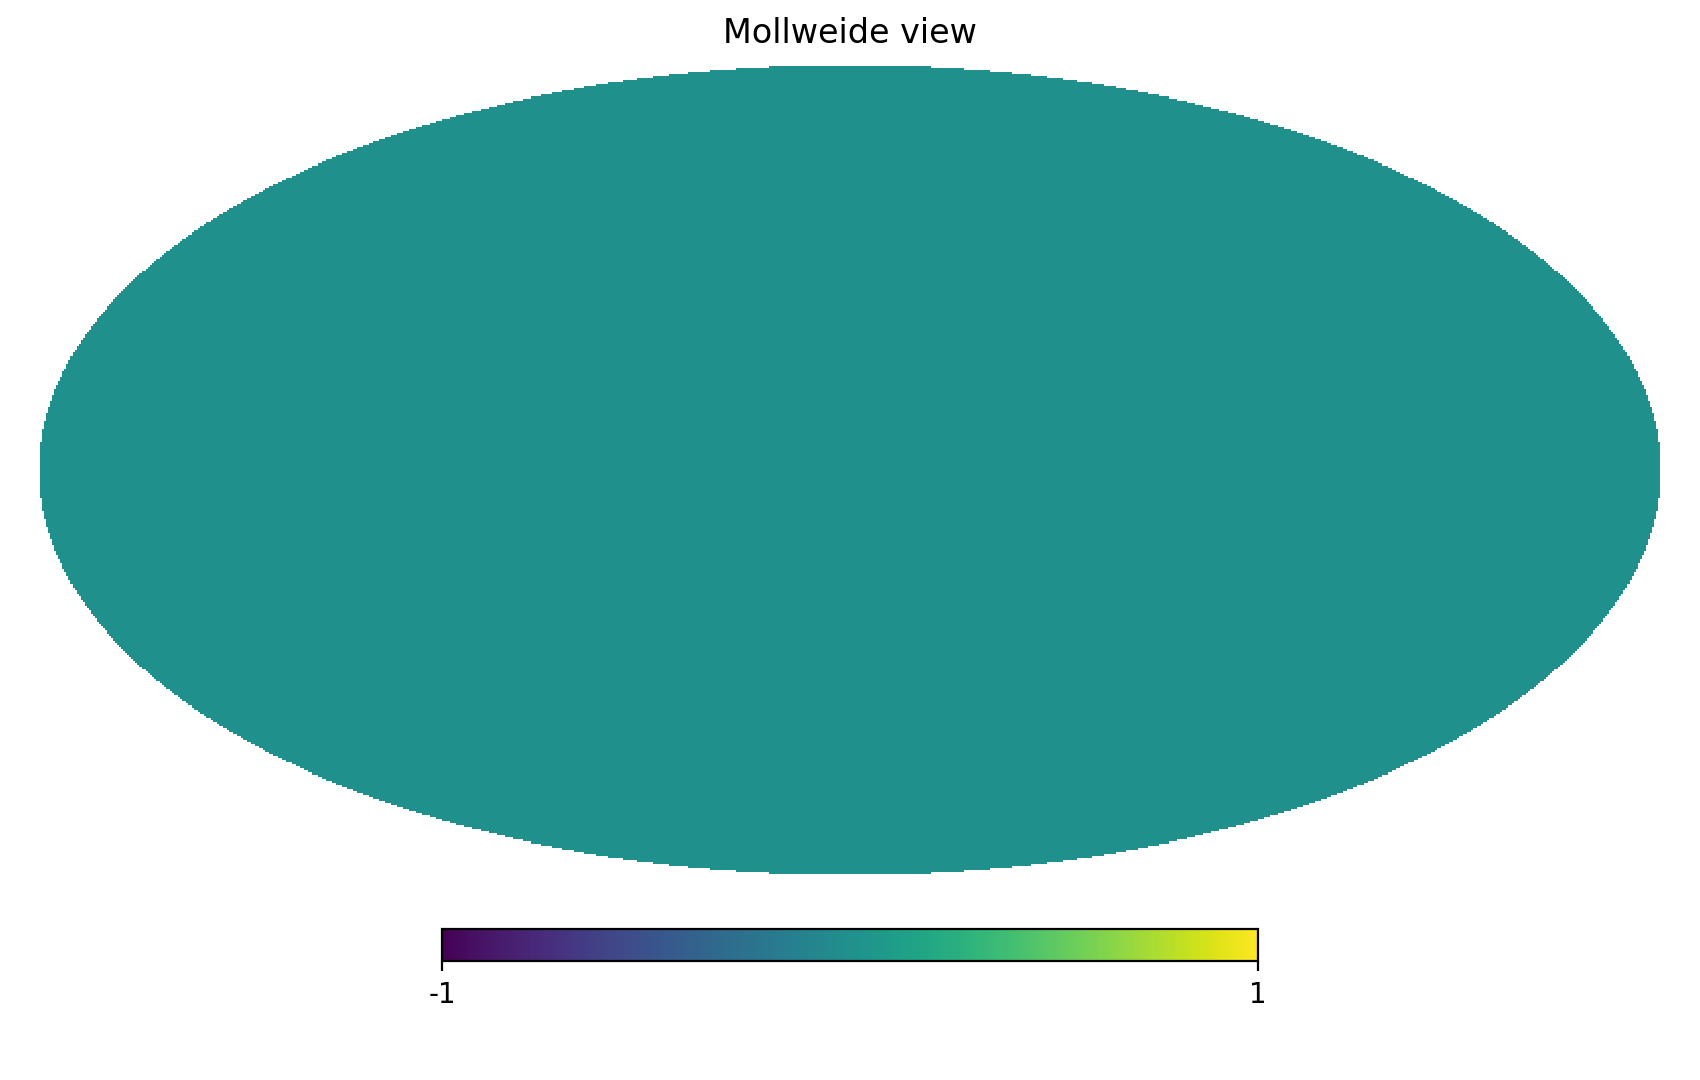

<IPython.core.display.Javascript object>


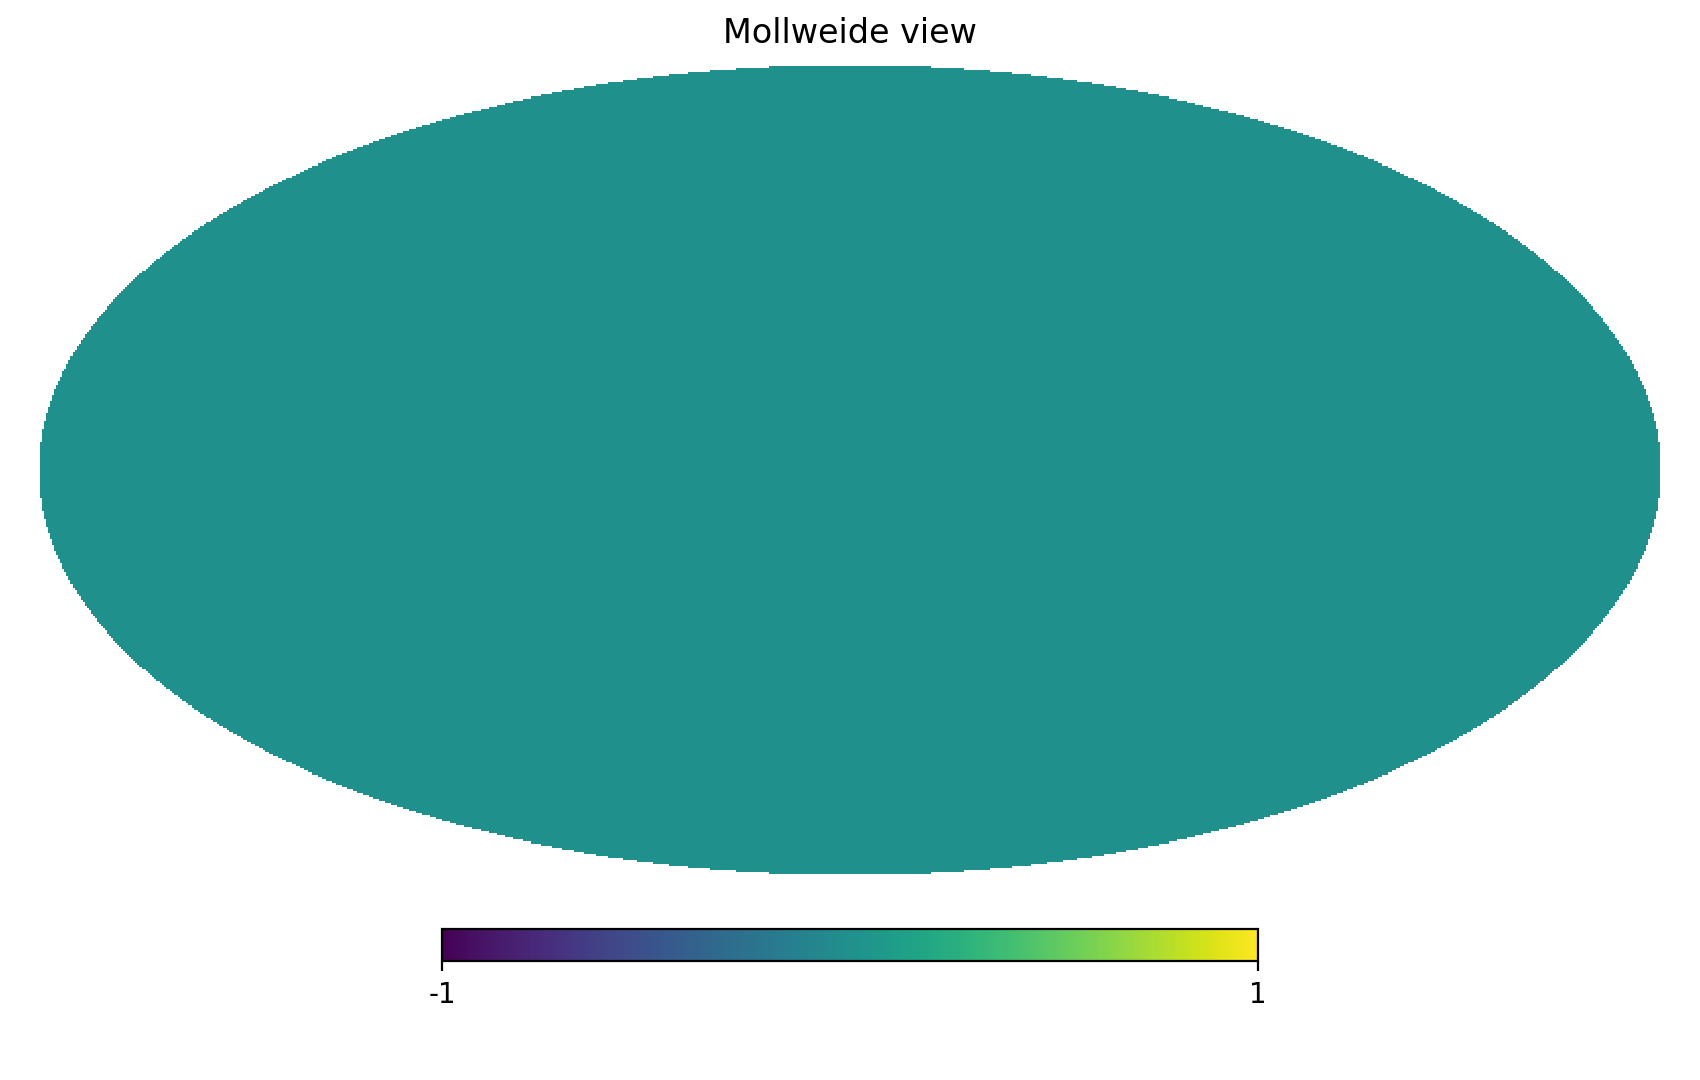

In [21]:
h.mollview(teb[1])
h.mollview(teb[2])

<IPython.core.display.Javascript object>


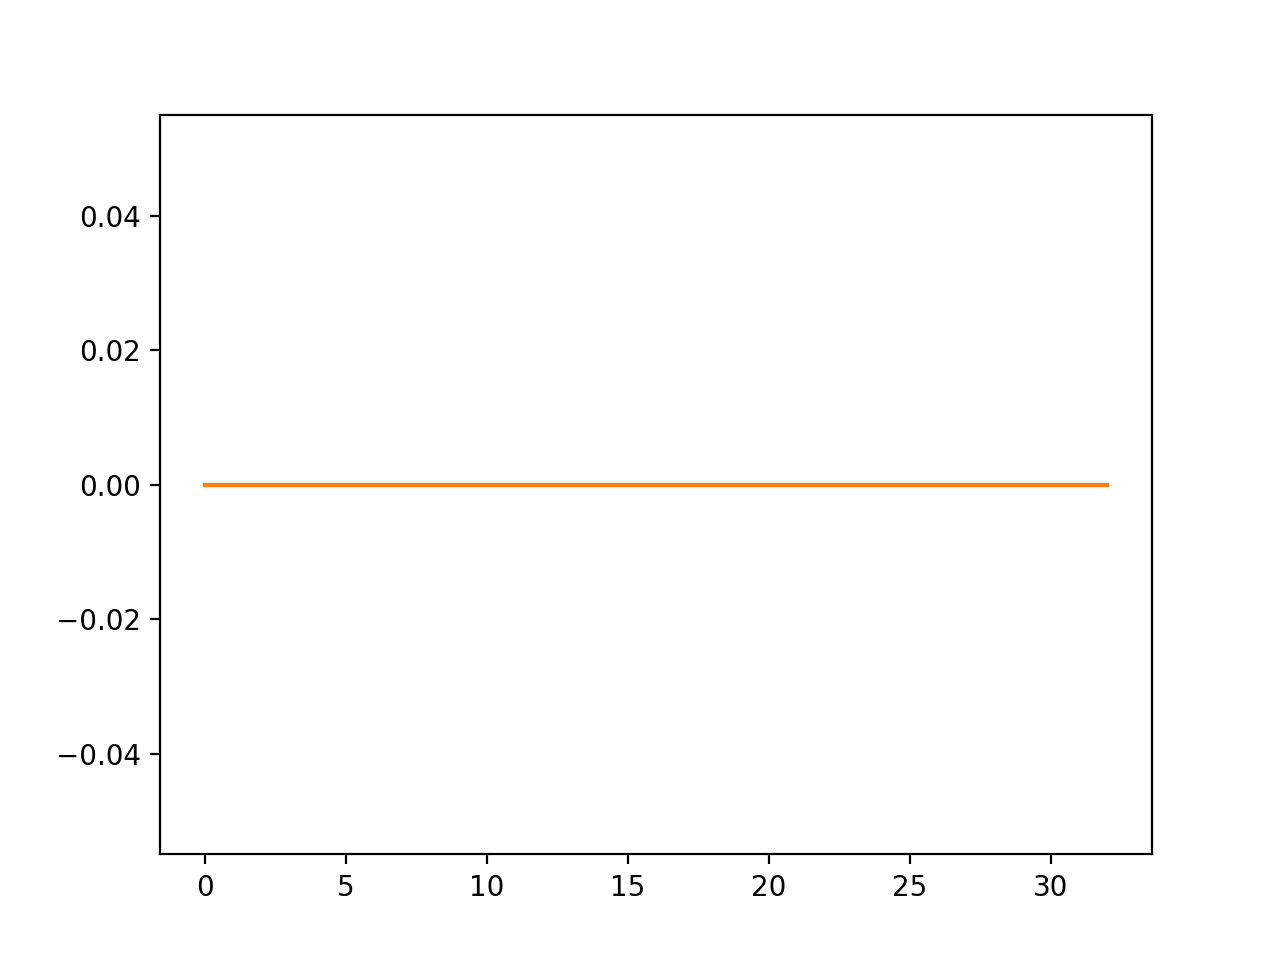

<IPython.core.display.Javascript object>


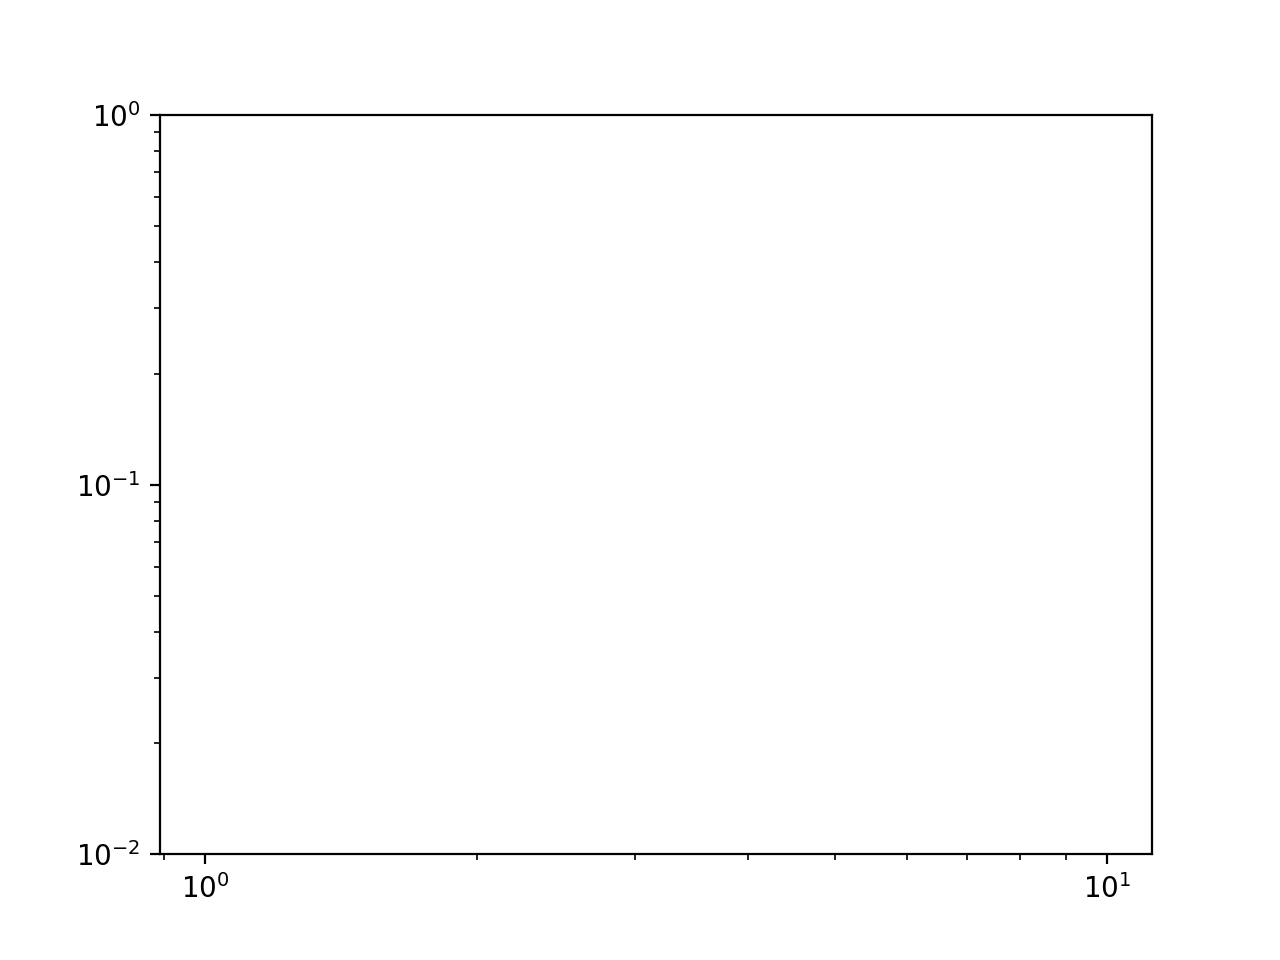

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


[]

In [22]:
clteb=h.alm2cl(h.map2alm(teb,lmax=lmax,pol=False))
ell=arange(lmax+1)
figure()
plot(ell,(ell**2.)*clteb[1])
plot(ell,(ell**2.)*clteb[2])
#loglog()

figure()
plot(ell,clteb[2]/clteb[1])
ylim(1e-2,1)
loglog()

<IPython.core.display.Javascript object>


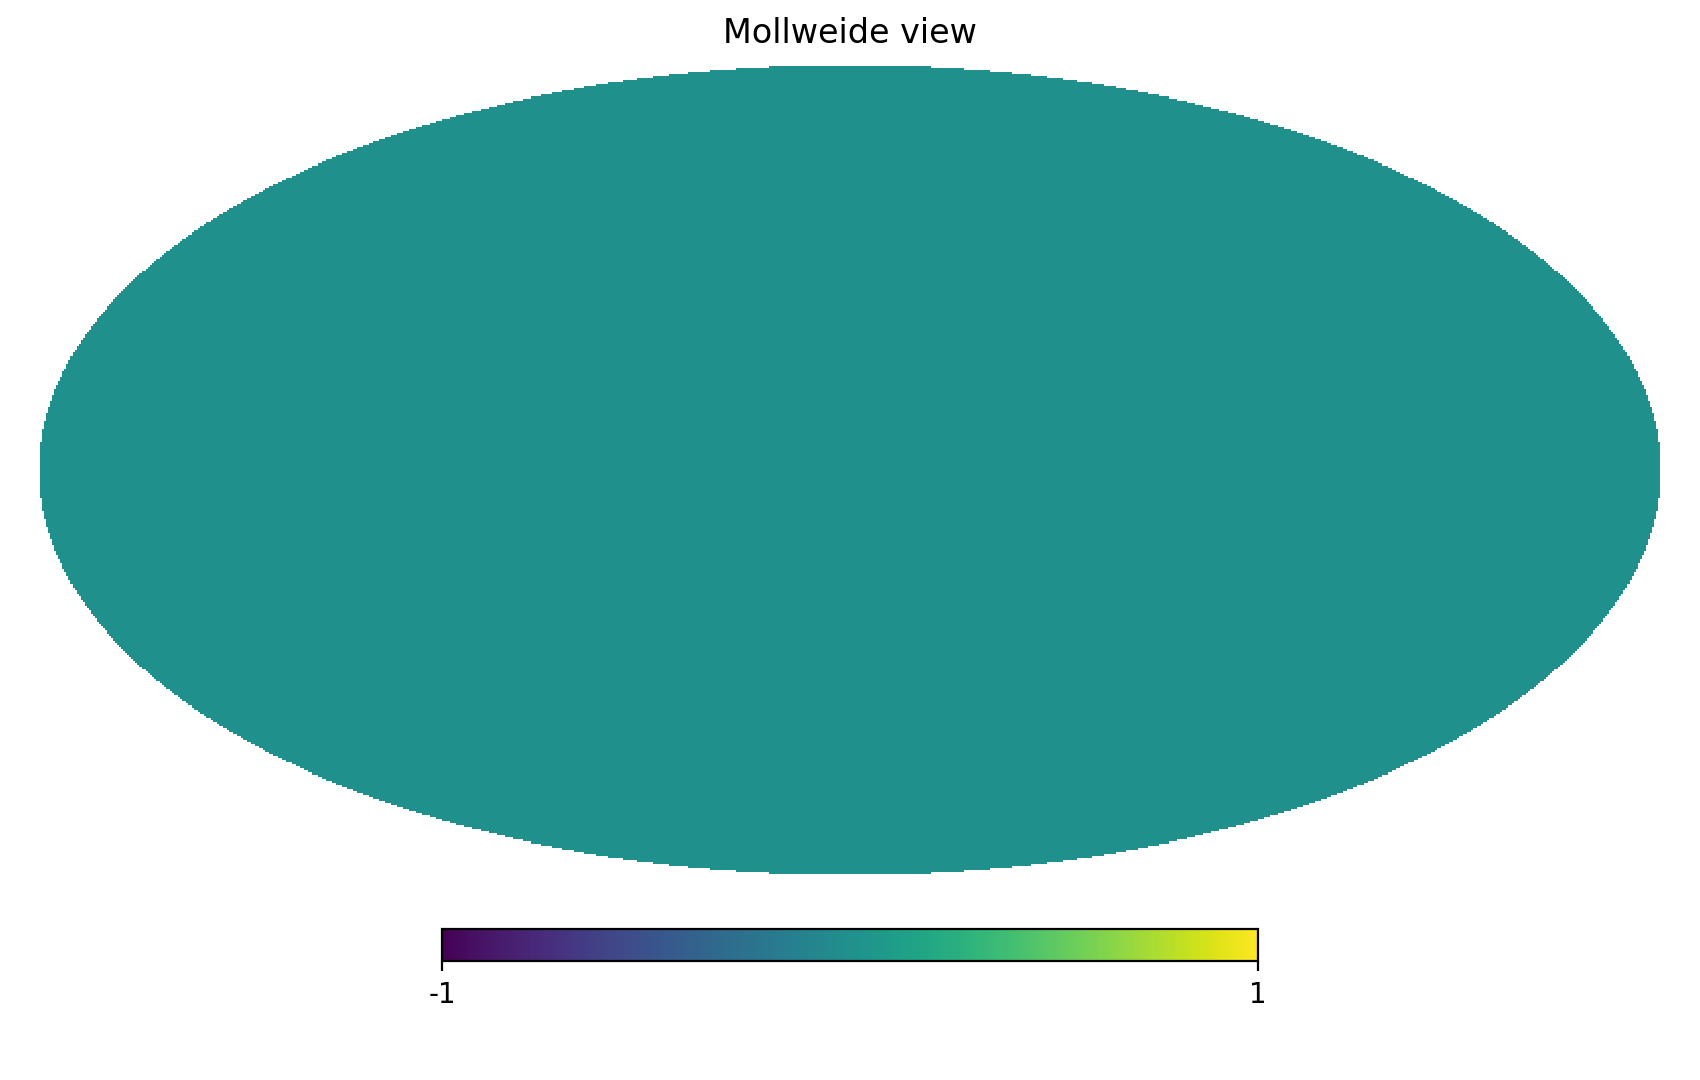

<IPython.core.display.Javascript object>


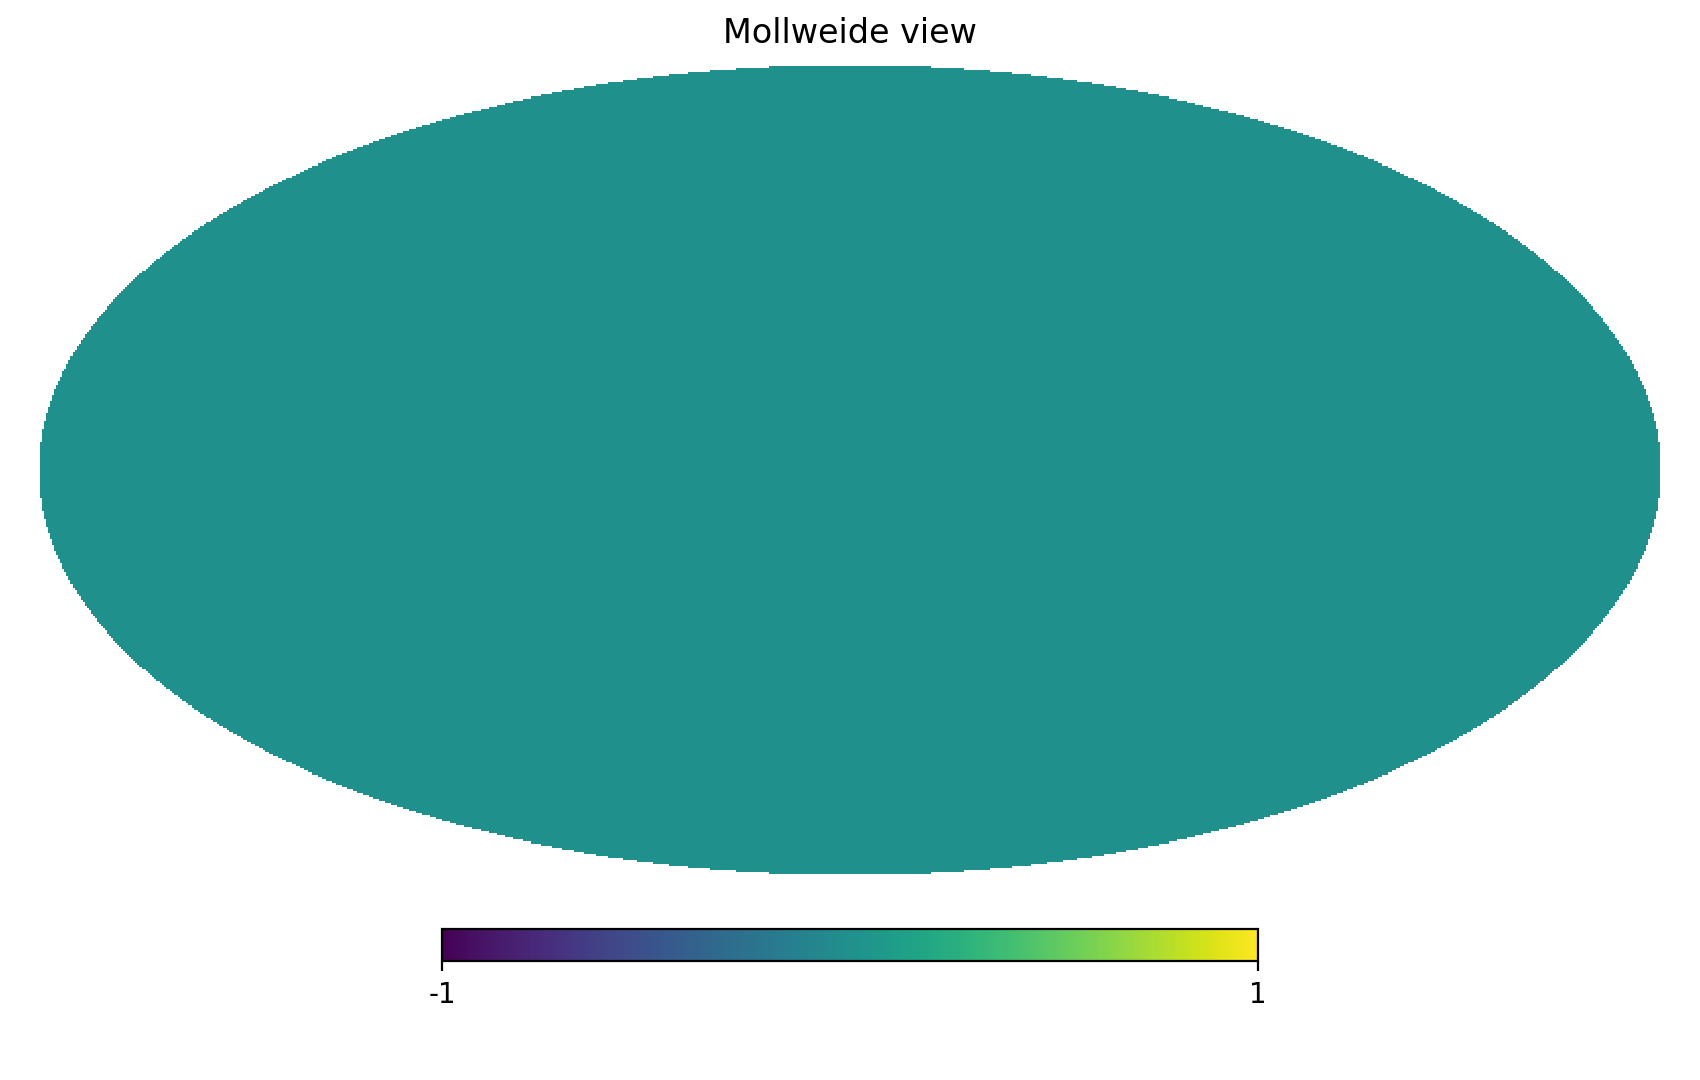

In [23]:
h.mollview(equi[1])
h.mollview(equi[2])

<IPython.core.display.Javascript object>


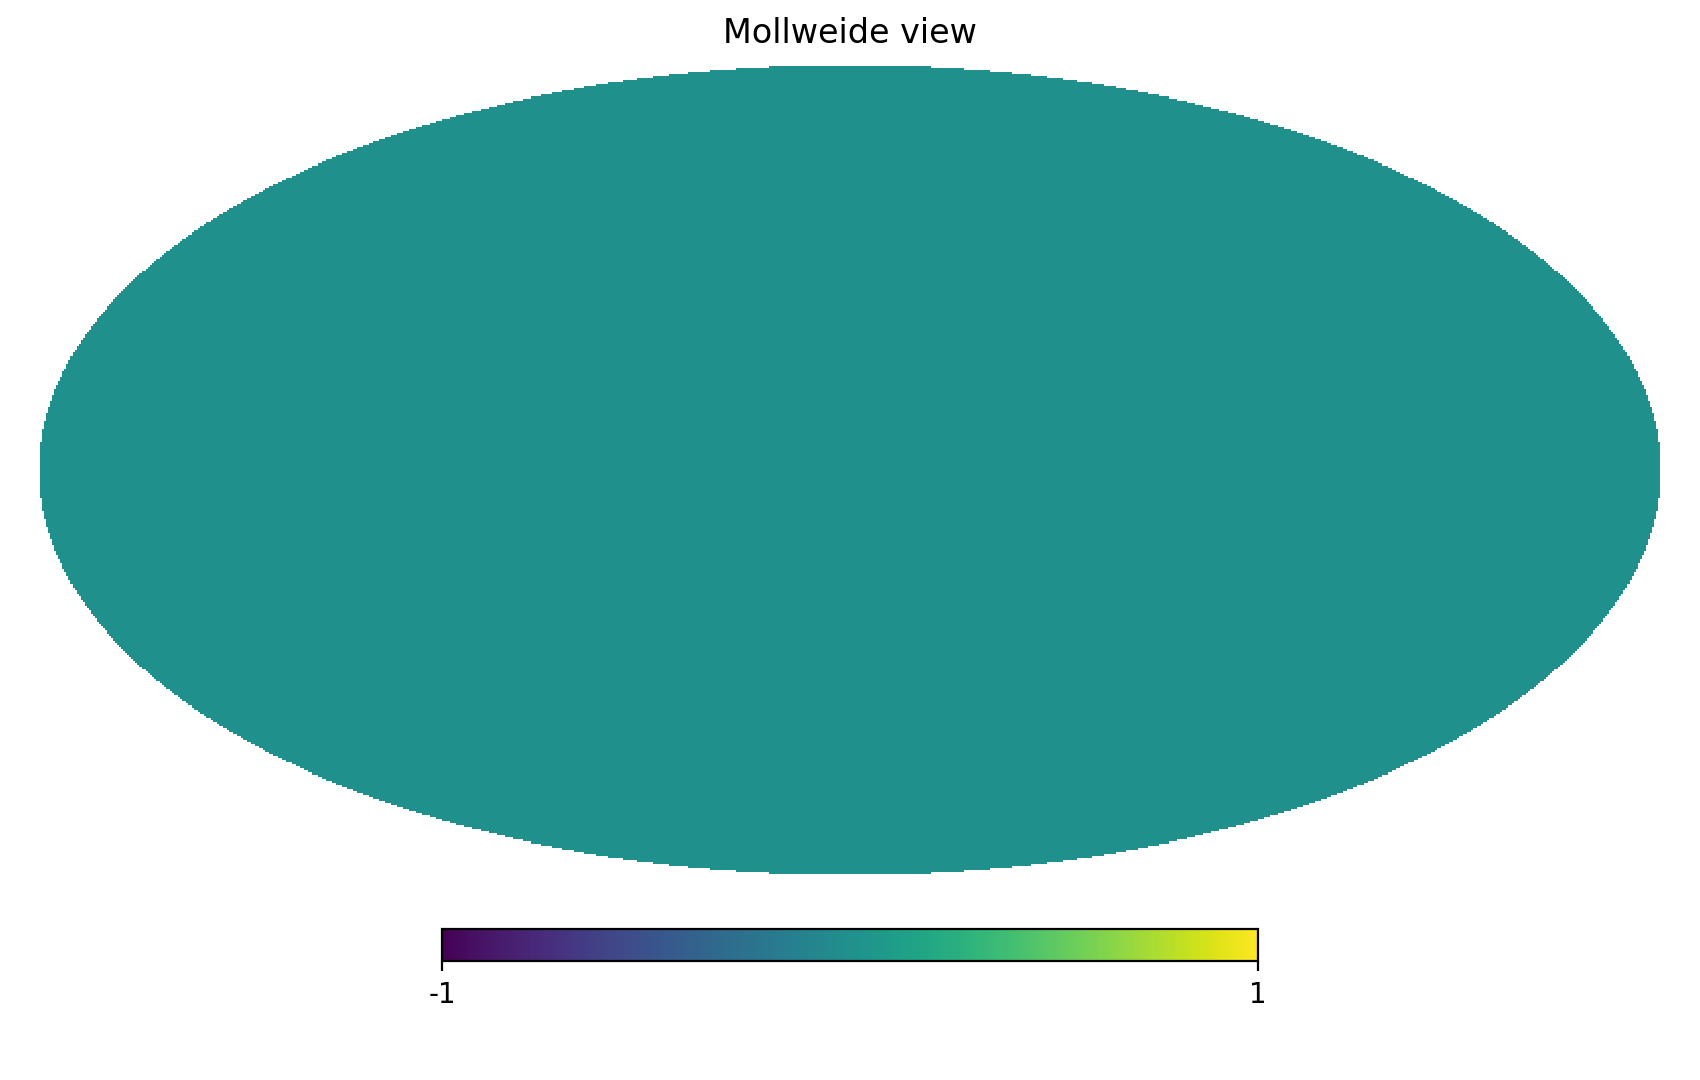

<IPython.core.display.Javascript object>


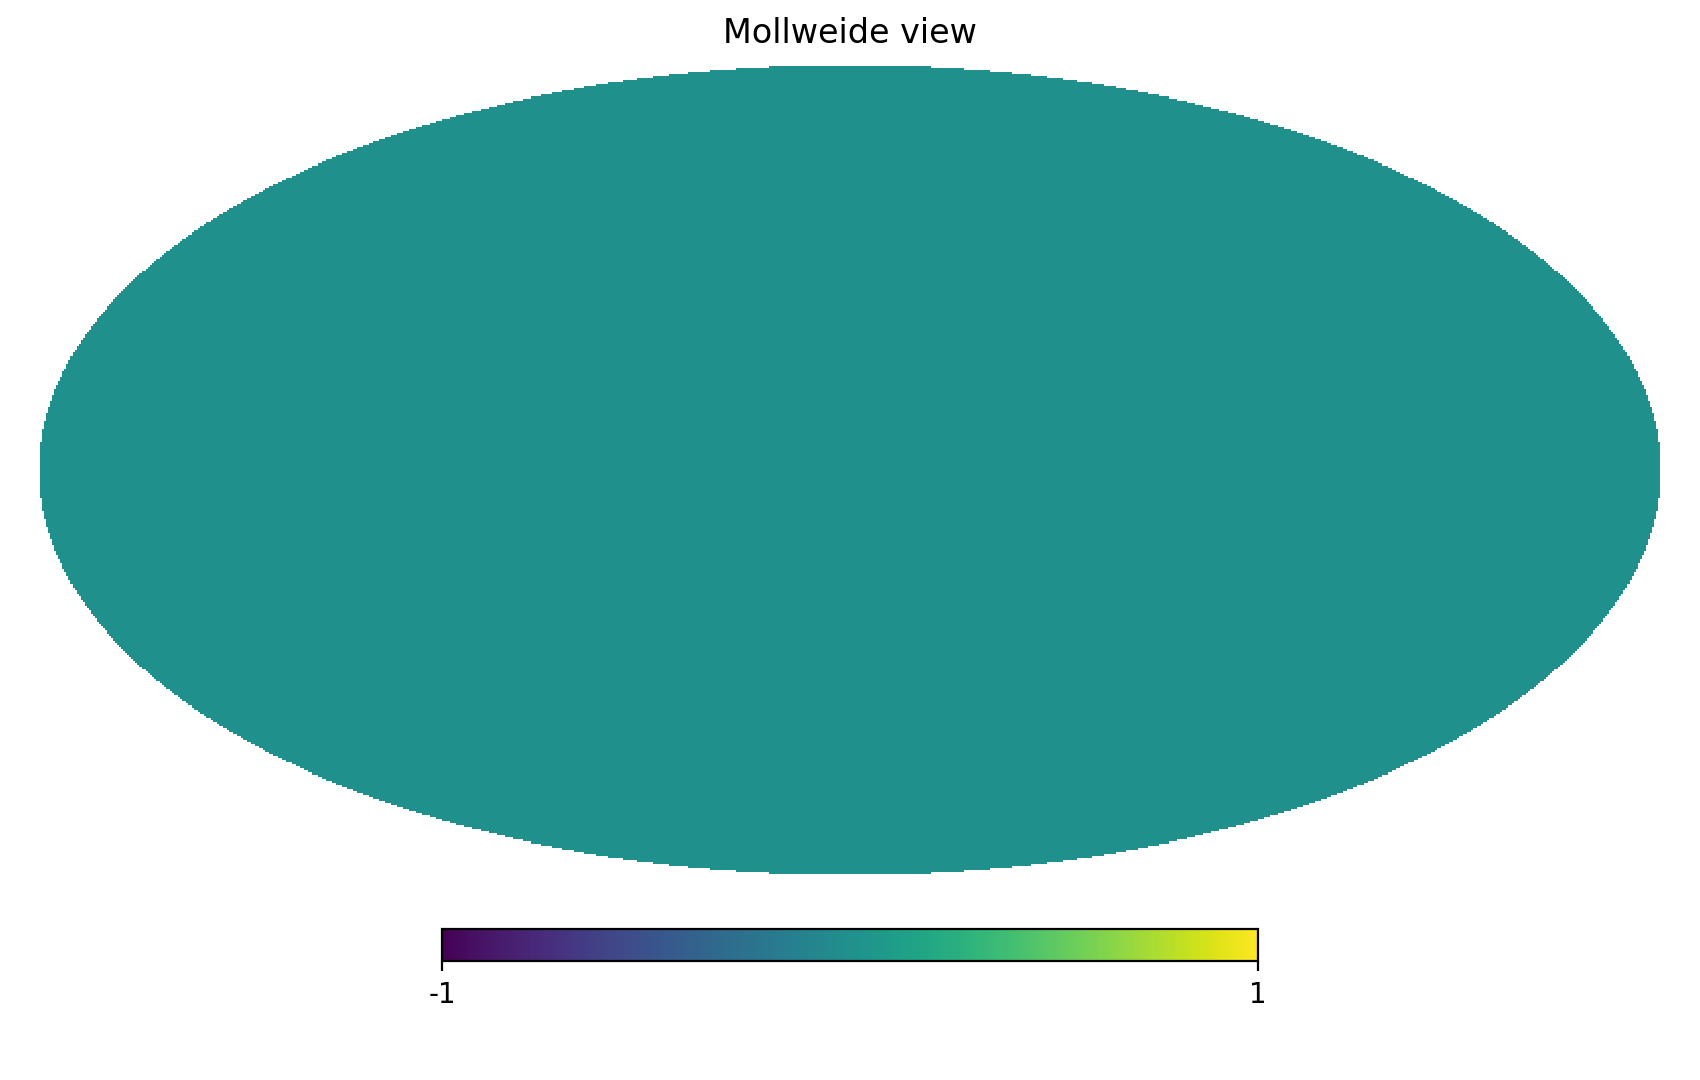

In [24]:
h.mollview(bqui[1])
h.mollview(bqui[2])

<IPython.core.display.Javascript object>


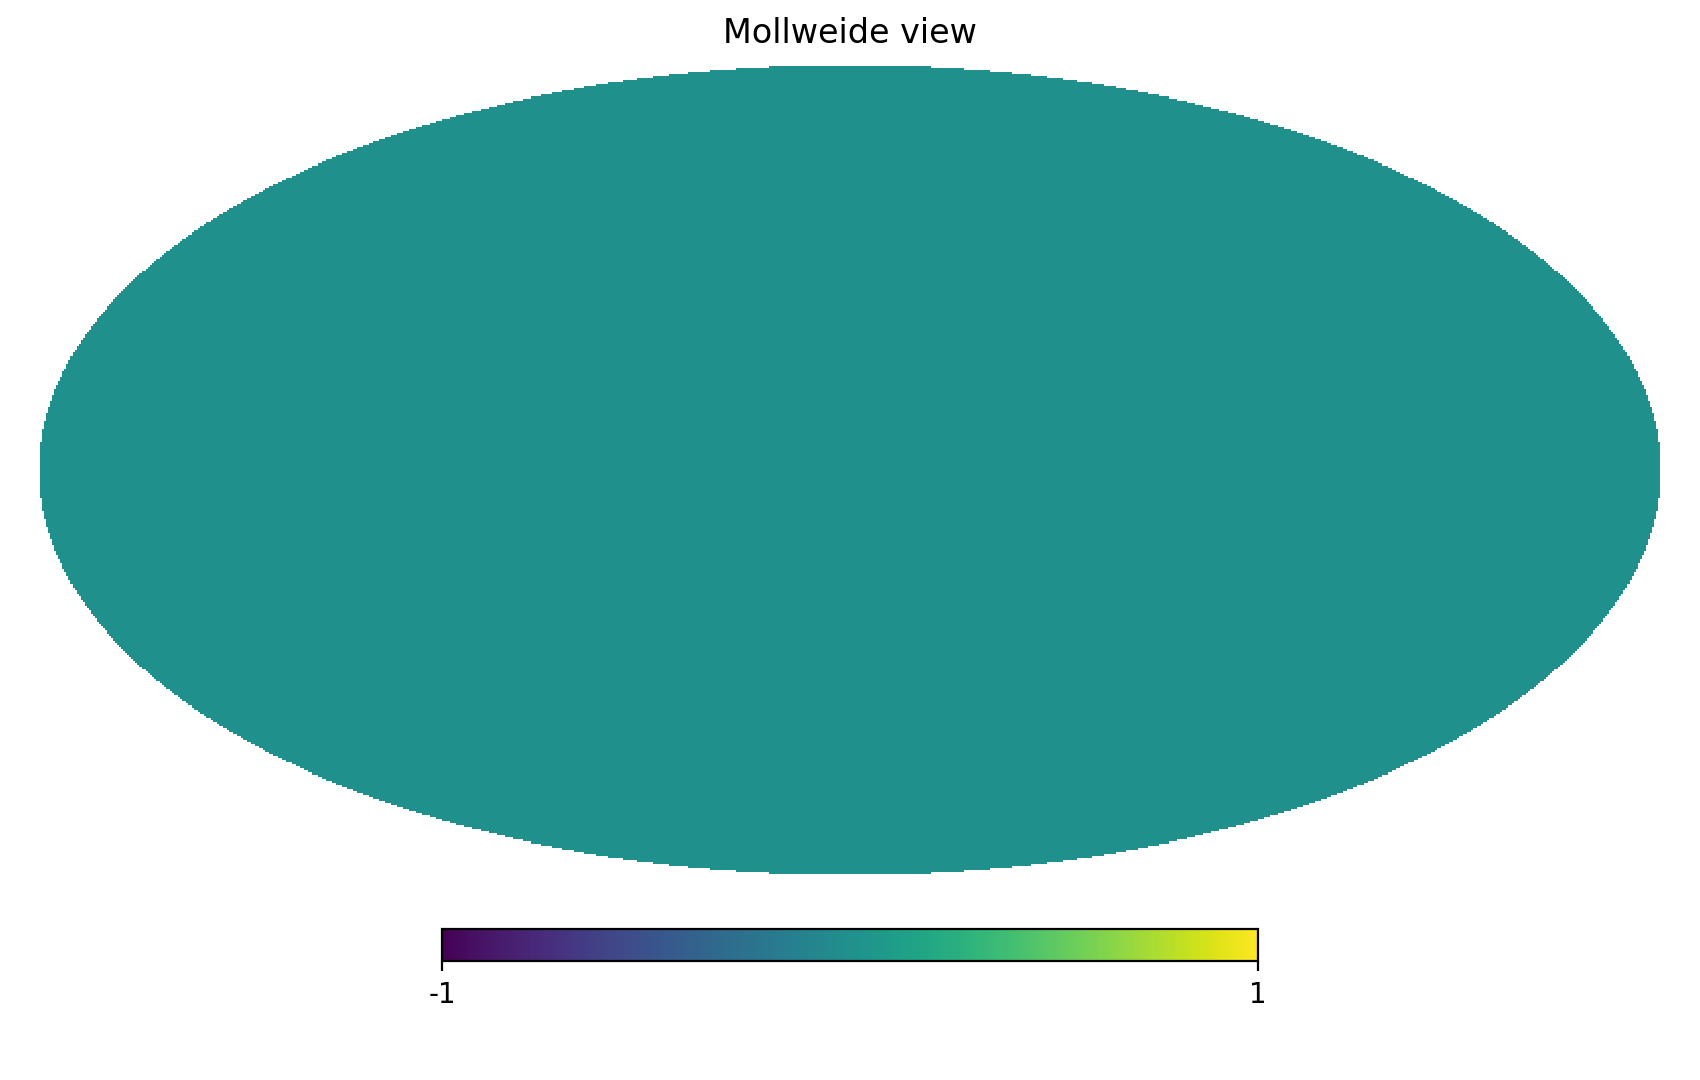

<IPython.core.display.Javascript object>


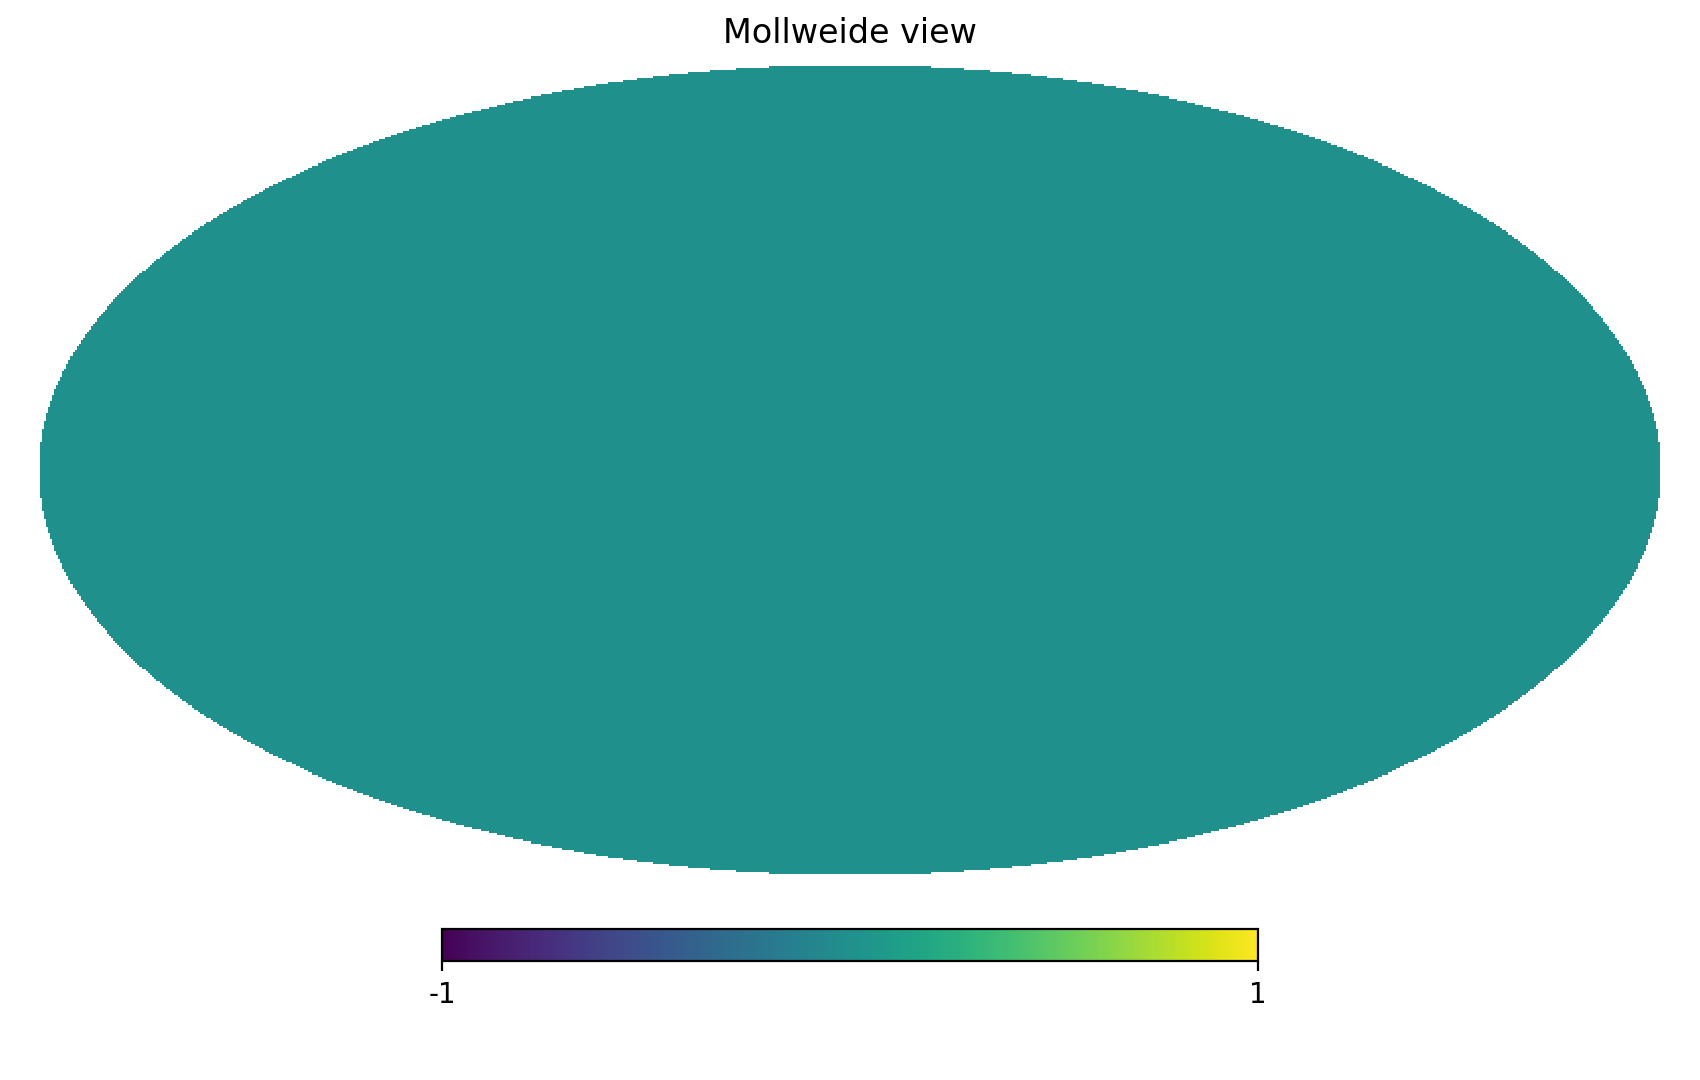

In [25]:
h.mollview(sqrt(bqui[1]**2 + bqui[1]**2.),rot=(0,0))
h.mollview(sqrt(equi[1]**2 + equi[1]**2.),rot=(0,0))

In [26]:
h.mollview(equr[2]-equi[2])
h.mollview(bqur[2]-bqui[2])

NameError: name 'equr' is not defined

In [27]:
h.mollview(equ[2]-ttque[2])
h.mollview(htque[2]-ttque[2])

NameError: name 'equ' is not defined

In [28]:
h.mollview(bqu[2]-ttqub[2])
h.mollview(htqub[2]-ttqub[2])

NameError: name 'bqu' is not defined